In [1]:
import numpy as np
import pandas as pd

In [2]:
ds = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')
ds.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
ds.shape

(60000, 785)

In [4]:
data_x = ds.iloc[:, 1:]

In [5]:
data_x.shape

(60000, 784)

In [6]:
data_x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## scaling

In [7]:
scaled_x = data_x.values/255.0

In [8]:
scaled_x.shape

(60000, 784)

In [9]:
import tensorflow as tf

## Placeholder and constants

In [10]:
batch_size = 150
num_epochs = 10

num_inputs = 784
neurons_h1 = 392
neurons_h2 = 196
neurons_h3 = neurons_h1
num_outputs = num_inputs

learning_rate = 0.001

In [11]:
X = tf.placeholder(tf.float32, [None,num_inputs])

## weights

In [12]:
initializer = tf.glorot_normal_initializer()

Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`


In [13]:
w1 = tf.Variable(initializer([num_inputs,neurons_h1]),tf.float32)
w2 = tf.Variable(initializer([neurons_h1,neurons_h2]),tf.float32)
w3 = tf.Variable(initializer([neurons_h2,neurons_h3]),tf.float32)
w4 = tf.Variable(initializer([neurons_h3,num_outputs]),tf.float32)

## Biases

In [14]:
b1 = tf.Variable(tf.zeros([neurons_h1]))
b2 = tf.Variable(tf.zeros([neurons_h2]))
b3 = tf.Variable(tf.zeros([neurons_h3]))
b4 = tf.Variable(tf.zeros([num_outputs]))

## activation and layers

In [15]:
act_fun = tf.nn.relu

In [16]:
hidden1 = act_fun(tf.matmul(X, w1) + b1)
hidden2 = act_fun(tf.matmul(hidden1, w2) + b2)
hidden3 = act_fun(tf.matmul(hidden2, w3) + b3)
output_layer = tf.nn.sigmoid(tf.matmul(hidden3, w4) + b4)

## loss and optimizer

In [17]:
loss = tf.reduce_mean(tf.square(output_layer-X))

In [18]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [19]:
train = optimizer.minimize(loss)

## Session

In [20]:
init = tf.global_variables_initializer()

In [21]:
saver = tf.train.Saver()

In [22]:
num_batches = scaled_x.shape[0]//batch_size
with tf.Session() as sess:
    sess.run(init)
    for ix in range(num_epochs):
        start = 0
        for cx in range(num_batches):
            batch = scaled_x[start:start+batch_size]
            start = start+batch_size
            
            sess.run(train, feed_dict = {X: batch})
            
        training_loss = loss.eval(feed_dict={X: batch})
        print("Epoch {} Complete. Training Loss: {}".format(ix,training_loss))
    saver.save(sess,'./stack_autoencoder_model/stack_autoencoder_model')

Epoch 0 Complete. Training Loss: 0.016507389023900032
Epoch 1 Complete. Training Loss: 0.012505174614489079
Epoch 2 Complete. Training Loss: 0.011085412465035915
Epoch 3 Complete. Training Loss: 0.0096368957310915
Epoch 4 Complete. Training Loss: 0.008973529562354088
Epoch 5 Complete. Training Loss: 0.008149821311235428
Epoch 6 Complete. Training Loss: 0.00833369605243206
Epoch 7 Complete. Training Loss: 0.007077847141772509
Epoch 8 Complete. Training Loss: 0.006810210179537535
Epoch 9 Complete. Training Loss: 0.0065214792266488075


## Testing

In [23]:
test_images = 10
test_data = pd.read_csv('./fashionmnist/fashion-mnist_test.csv')

In [24]:
test_data.shape

(10000, 785)

In [25]:
test_x = test_data.iloc[:, 1:]

In [26]:
scaled_test_x = test_x.values/255.0

In [27]:
scaled_test_x.max()

1.0

In [28]:
test_set = scaled_test_x[:test_images]

In [29]:
with tf.Session() as sess:
    saver.restore(sess,'./stack_autoencoder_model/stack_autoencoder_model')
    results = output_layer.eval(feed_dict={X: test_set})

INFO:tensorflow:Restoring parameters from ./stack_autoencoder_model/stack_autoencoder_model


In [30]:
import matplotlib.pyplot as plt

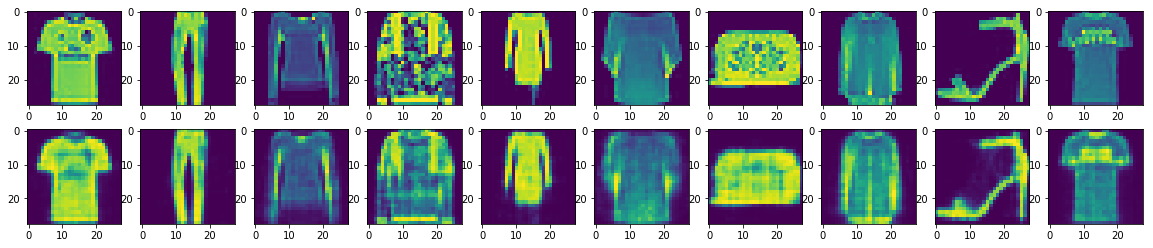

In [31]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(test_images):
    a[0][i].imshow(np.reshape(test_set[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (28, 28)))